<a href="https://colab.research.google.com/github/imcinstitute/ML-labs/blob/main/Lab_III_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Machine Learning with scikit-learn

## Clustering

For an introduction to clustering algorithms, let us look at another visualization copied from the [scikit-learn documentation](http://scikit-learn.org/stable/modules/clustering.html). This is a visualization of several synthetic distributions in two dimensions to allow visualization.  We can  see that some distributions that do not have convex differentiation throw off some clutering algorithms.  Of course, given the low dimensionality, these examples are somewhat toys.

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Distances in Parametric Space

This is mostly for a later lesson, but many clustering algorithms are sensitive to the distances between points in a parameteric space in a unit-dependent way.  A later lesson on feature engineering will look at scaling data in more detail.  For some of the examples in this lesson, scaling will make little difference; however, for a few of them the absolute units of features becomes important.

Therefore, in the below examples, you will see line like this in the cells that fit models:

```python
X = StandardScaler().fit_transform(the_data)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(boston.data)

## Cluster into N Classes

For the next few cells, we will use `SpectralClustering` to group our dataset into four synthetic classes.  Informally, we will call these classes "low", "mid_low", "mid_high", and "high" corresponding to our hypothesis that price is a good proxy for these classes.  From the documentation, the algorithm is described as follows:

> `SpectralClustering` does a low-dimension embedding of the affinity matrix between samples, followed by a KMeans in the low dimensional space. It is especially efficient if the affinity matrix is sparse and the [`pyamg`](https://github.com/pyamg/pyamg) module is installed. `SpectralClustering` requires the number of clusters to be specified. It works well for a small number of clusters but is not advised when using many clusters.

In [ ]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 spectral = cluster.SpectralClustering(
        n_clusters=4, eigen_solver='arpack',
        affinity="nearest_neighbors")

After fitting the data, what we get is labels for each sample.  These are simply integers in `range(n_clusters)`, with no inherent semantic meaning.  I.e. 0, 1, 2, or 3 in this case.

In [ ]:
print(model.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3 3 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 3 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0 0 0 0 0 3 3 3 0 3 0 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 2 2 2 3 2 2 3 3 2 3 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 0 2 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2
 3 3 3 3 3 3 3 3 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

After we do the clustering, let us group the dataset by the cluster labels.  We will enhance the Pandas DataFrame that holds the data by adding columns for the derived category and the known price.  We also give hopefully more meaningful names to the clusters.  We only display some of the features to narrow discussion.

In [ ]:
# Let us do minor Pandas manipulation to view clusters in an intuitive way
boston_df['category'] = model.labels_
boston_df['PRICE'] = boston.target
boston_clusters = boston_df.groupby('category').mean().sort_values('PRICE')
boston_clusters.index = ['low', 'mid_low', 'mid_high', 'high']
cols = ['PRICE'] + list(boston_clusters.columns[:-1])
boston_clusters = boston_clusters[cols]
boston_clusters[['PRICE', 'CRIM', 'RM', 'AGE', 'DIS']]

,PRICE,CRIM,RM,AGE,DIS
low,15.468421,11.000595,5.931428,91.007237,2.013852
mid_low,24.030085,0.364622,6.326644,66.333898,3.930817
mid_high,27.805882,1.905690,6.478324,79.050000,2.945729
high,28.975000,0.065576,6.727345,30.039286,6.980458


At first brush, it looks like price is pretty well differentiated by cluster.  Remember that price did not participate in the clustering model; so inasmuch as they correspond, it confirms our working hypothesis.

Other columns have interstingly different patterns.  Crime rate is high for the "low" category houses, then drops to almost none for "mid_low", "mid_high", and "high."  In contrast, the number of rooms varies little by category.  Distance to employment centers is low and similar for the first three categories of houses, but much larger for the "high" category houses.  Age of house shows a similar, but less dramatic, pattern as distance.

Let us try to get a handle on who well price is genuinely differentiated by category.

In [ ]:
clusters = boston_df.groupby('category').PRICE.agg(['mean', 'median', 'std']).sort_values('mean')
clusters.index = ['low', 'mid_low', 'mid_high', 'high']
clusters

,mean,median,std
low,15.468421,14.45,6.430293
mid_low,24.030085,22.00,7.902883
mid_high,27.805882,23.15,11.373839
high,28.975000,27.25,7.746214


In a visual representation of the pattern we see *pretty good* but not overwhelming differentiation. One category of houses show a wide range of prices, while other categories tend to be more narrowly centered.

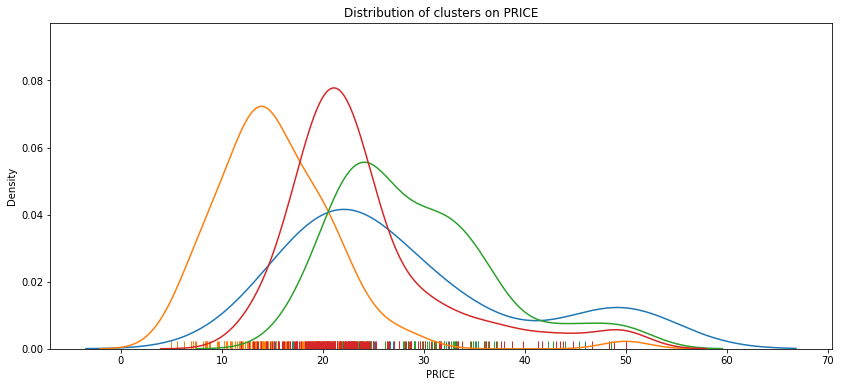

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,6))

sns.distplot(boston_df[boston_df.category == 0].PRICE, hist=False, rug=True)
sns.distplot(boston_df[boston_df.category == 1].PRICE, hist=False, rug=True)
sns.distplot(boston_df[boston_df.category == 2].PRICE, hist=False, rug=True)
sns.distplot(boston_df[boston_df.category == 3].PRICE, hist=False, rug=True)
ax.set_title("Distribution of clusters on PRICE");

Given our fairly successful confirmation of our hypothesis in regard to 1970s Boston housing prices  relative to independent features, let us try the same exercise with the much larger 1990s California housing prices dataset.

In [ ]:
# Fit several clustering models that take n_clusters
from sklearn import cluster

X = StandardScaler().fit_transform(boston.data)

models = [cluster.SpectralClustering(n_clusters=4), 
          cluster.KMeans(n_clusters=4), 
          cluster.MiniBatchKMeans(n_clusters=4), 
          cluster.AgglomerativeClustering(n_clusters=4)]

for model in models:
    model.fit(X)
    print(model.__class__.__name__)
    print("\tFirst 5 labels", model.labels_[:5])
    print("\t", len(model.labels_))

SpectralClustering
	First 5 labels [0 0 0 0 0]
	 506
KMeans
	First 5 labels [1 1 1 1 1]
	 506
MiniBatchKMeans
	First 5 labels [0 2 2 0 0]
	 506
AgglomerativeClustering
	First 5 labels [0 0 0 0 0]
	 506


In the example above, all four clustering models selected assigned the same class to the first five samples.  However, the particular number given to that class might be any of the four possible values (depending even on random seeds).  The label numbers are not interesting, only the samples assigned to them.

In [ ]:
# ... then measure their pairwise similarity
from sklearn import metrics
from itertools import combinations

for clust1, clust2 in combinations(models, 2):
    print(clust1.__class__.__name__, "versus", clust2.__class__.__name__)
    print("\tRand score:", metrics.adjusted_rand_score(clust1.labels_, clust2.labels_))
    print("\tMutual info:", metrics.adjusted_mutual_info_score(clust1.labels_, clust2.labels_))


SpectralClustering versus KMeans
	Rand score: 0.5007432836108199
	Mutual info: 0.6250423744484865
SpectralClustering versus MiniBatchKMeans
	Rand score: 0.47199012066950025
	Mutual info: 0.6292439023674503
SpectralClustering versus AgglomerativeClustering
	Rand score: 0.550129525055905
	Mutual info: 0.7298262007281899
KMeans versus MiniBatchKMeans
	Rand score: 0.8124075442004166
	Mutual info: 0.8358105300621039
KMeans versus AgglomerativeClustering
	Rand score: 0.43894990177154813
	Mutual info: 0.605454287068588
MiniBatchKMeans versus AgglomerativeClustering
	Rand score: 0.4730009548732117
	Mutual info: 0.6085005936450512
